<a href="https://colab.research.google.com/github/igordantasgf/analise_dados_microambientais/blob/main/fly_eye_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
col = ['TIMESTAMP', '"RECORD"', '"rtime"', '"batt_volt"', '"panel_temp"', '"CM3Up_mv_Avg"', '"CM3Up_Wm2_Avg"', '"CMP21_Avg"', '"CMP21_Wm2_Avg"', '"CelSol_01_Avg"', '"CelSol_02_Avg"', '"CelSol_03_Avg"', '"CelSol_04_Avg"', '"CelSol_05_Avg"', '"CelSol_06_Avg"', '"CelSol_07_Avg"', '"CelSol_08_Avg"', '"CelSol_09_Avg"', '"CelSol_10_Avg"', '"CelSol_11_Avg"', '"CelSol_12_Avg"', '"CelSol_13_Avg"', '"CelSol_14_Avg"', '"CelSol_15_Avg"', '"CelSol_16_Avg"', '"CelSol_17_Avg"']
labmim = pd.read_csv('/content/drive/MyDrive/Bolsa - Edson/plataforma/LBM_solar_2022.dat',sep=';', header=None,skiprows=lambda x:x in [0,1,2,3], names=col)
labmim[col] = labmim.TIMESTAMP.str.split(",", expand = True)

In [17]:
def calcular_nan():
  count = labmim.isna().any(axis=1).sum()
  print(f"Number of rows with at least one NaN value: {count}")
  print(f"Total rows in series: {len(labmim)}")
calcular_nan()

Number of rows with at least one NaN value: 0
Total rows in series: 459301


### Organização dos valores
##### Sequenciamento dos valores e suas respectivas coordenadas bidimensionais em duas litas separadas 

In [18]:
sensors=col[9:]
values=[]

grau=np.radians([90,135,180,225,270,315,360,45,90,135,180,225,270,315,360,45,0])
altura=np.array([100,100,100,100,100,100,100,100,50,50,50,50,50,50,50,50,0])
coord=[]
for a,b in zip(grau,altura):
  coord.append([a,b])

labmim_backup = labmim

for i in sensors:
  x=0
  unique_types = set()
  #for item in labmim_backup[i]:
  #  unique_types.add(type(item))
  #print(unique_types)
  labmim_backup[i] = [int(x) if str(x).isdigit() else 0 for x in labmim_backup[i]]
  values.append(sum(labmim_backup[i]))

values = np.array(values)

In [19]:
""" CORRIGIR ESTE CÓDIGO """

#plt.subplot(projection="polar")
#plt.pcolormesh(coord, values, cmap="coolwarm", shading='auto')
#plt.colorbar()
#plt.show()

' CORRIGIR CÓDIGO ACIMA '

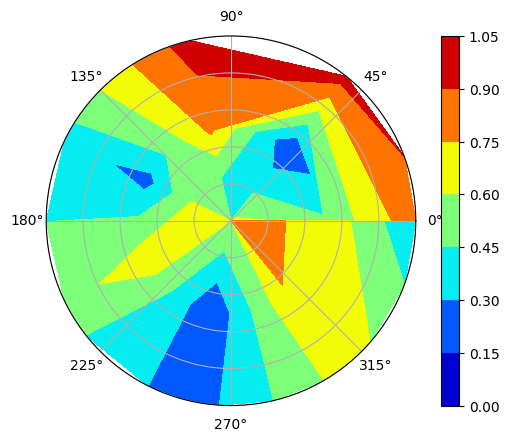

In [20]:
#https://stackoverflow.com/questions/31051882/matplotlib-density-plot-in-polar-coordinates/31142319#31142319
#In this example, a is you theta1...thetan, b is your r1...rn, c is your f(a, b):

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

#fake data:
a = np.linspace(0,2*np.pi,8) # Sepação das partes em radianos
b = np.linspace(0,1,3) # Camadas por distancia ao centro
A, B = np.meshgrid(a, b)
c = np.random.random(A.shape)

#actual plotting
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(a, b, c, cmap=cm.jet)
plt.colorbar(ctf)